In this lab excercise you will learn how to do market basket analysis using apriori algorithm. 

Install  __mlxtend__ library from anaconda prompt 


In [1]:
#import all required classes for market basket analysis from mlxtedn library
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
#import pandas library 
import pandas as pd

# Example 4

In this example we will read data from csv file where data is in the following format
The data set is provided for arules by Michael Hahsler, Kurt Hornik and Thomas Reutterer.

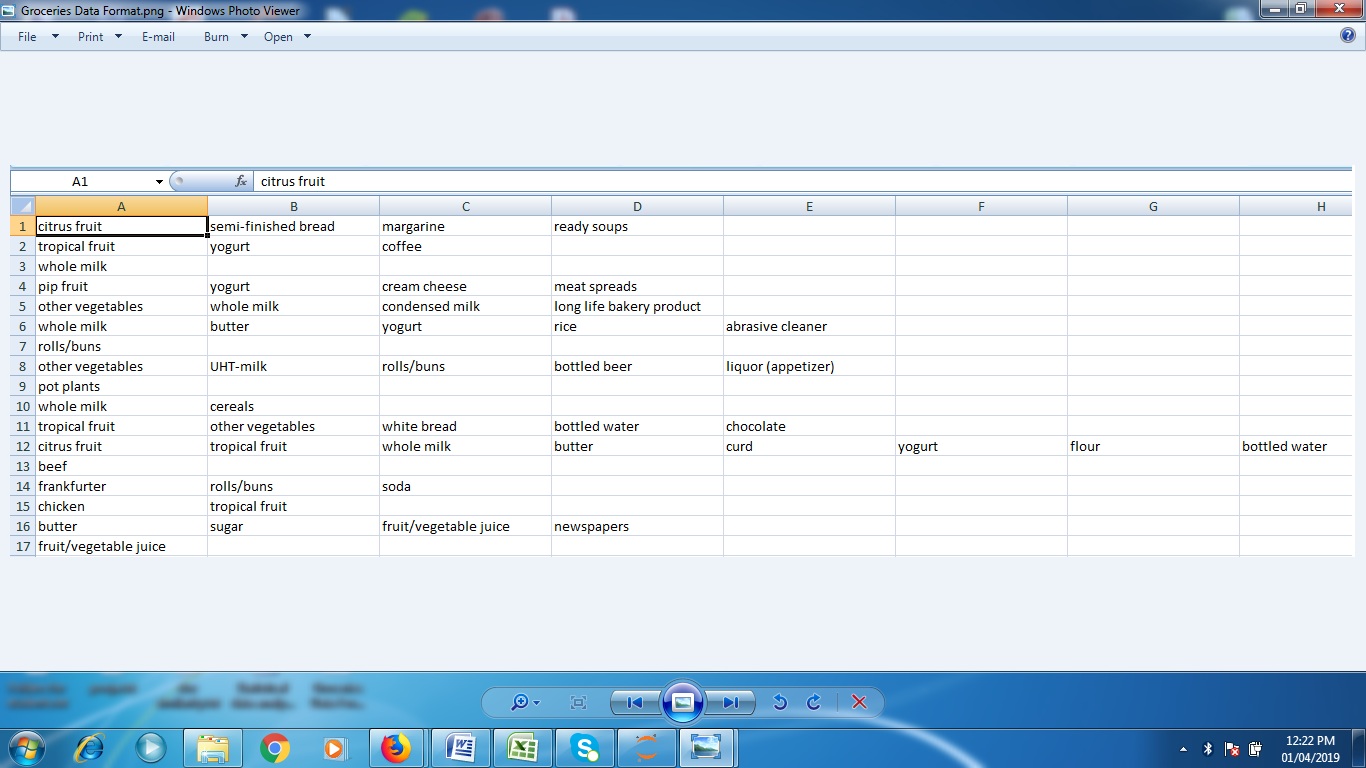

In [2]:
import csv
with open('d:/mdp iitb/groceries.csv', 'r') as f:
    reader = csv.reader(f)
    your_list = list(reader)

In [3]:
len(your_list)

9835

To use apriori algorithm on transaction dataset requirement is that data should be in tabular
format where each row represents transaction and column represents existance of 
item in transaction. So let us first transform transaction data to the format required by algorithm

In [4]:
te=TransactionEncoder()

In [5]:
trans_array=te.fit(your_list)

In [6]:
trans_array=trans_array.transform(your_list)

In [7]:
#create data frame
df = pd.DataFrame(trans_array, columns=te.columns_)

In [17]:
df.shape

(9835, 169)

In [8]:
#find frequent item sets
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

In [9]:
type(frequent_itemsets)

pandas.core.frame.DataFrame

In [10]:
#check data size
frequent_itemsets.shape

(333, 2)

In [11]:
#generate rules
rules=association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

In [12]:
type(rules)

pandas.core.frame.DataFrame

In [13]:
#check size of the rules generated
rules.shape

(15, 9)

In [14]:
#display rules
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(butter, other vegetables)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,0.006371,1.745992
1,"(citrus fruit, root vegetables)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059
2,"(curd, yogurt)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,0.005649,1.782567
3,"(domestic eggs, other vegetables)",(whole milk),0.022267,0.255516,0.012303,0.552511,2.162336,0.006613,1.663694
4,"(pip fruit, other vegetables)",(whole milk),0.026131,0.255516,0.013523,0.517510,2.025351,0.006846,1.543003
5,"(rolls/buns, root vegetables)",(other vegetables),0.024301,0.193493,0.012201,0.502092,2.594890,0.007499,1.619792
6,"(root vegetables, tropical fruit)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244
7,"(root vegetables, yogurt)",(other vegetables),0.025826,0.193493,0.012913,0.500000,2.584078,0.007916,1.613015
8,"(whipped/sour cream, other vegetables)",(whole milk),0.028876,0.255516,0.014642,0.507042,1.984385,0.007263,1.510239
9,"(other vegetables, yogurt)",(whole milk),0.043416,0.255516,0.022267,0.512881,2.007235,0.011174,1.528340


In [15]:
#find length of antecedent, consequents and total length of each rule
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_len"] = rules["consequents"].apply(lambda x: len(x))
rules["total_len"] = rules["antecedent_len"]+rules["consequents_len"]

In [16]:
#Display rules
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequents_len,total_len
0,"(butter, other vegetables)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,0.006371,1.745992,2,1,3
1,"(citrus fruit, root vegetables)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059,2,1,3
2,"(curd, yogurt)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,0.005649,1.782567,2,1,3
3,"(domestic eggs, other vegetables)",(whole milk),0.022267,0.255516,0.012303,0.552511,2.162336,0.006613,1.663694,2,1,3
4,"(pip fruit, other vegetables)",(whole milk),0.026131,0.255516,0.013523,0.517510,2.025351,0.006846,1.543003,2,1,3
5,"(rolls/buns, root vegetables)",(other vegetables),0.024301,0.193493,0.012201,0.502092,2.594890,0.007499,1.619792,2,1,3
6,"(root vegetables, tropical fruit)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244,2,1,3
7,"(root vegetables, yogurt)",(other vegetables),0.025826,0.193493,0.012913,0.500000,2.584078,0.007916,1.613015,2,1,3
8,"(whipped/sour cream, other vegetables)",(whole milk),0.028876,0.255516,0.014642,0.507042,1.984385,0.007263,1.510239,2,1,3
9,"(other vegetables, yogurt)",(whole milk),0.043416,0.255516,0.022267,0.512881,2.007235,0.011174,1.528340,2,1,3


In [27]:
r1=rules[ (rules['antecedent_len'] >= 1) &
       (rules['total_len'] > 2) &
       (rules['consequents_len'] ==1)     ]

In [48]:
r1.sort_values(by=["lift"], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequents_len,total_len
1,"(root vegetables, citrus fruit)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059,2,1,3
6,"(root vegetables, tropical fruit)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244,2,1,3
5,"(root vegetables, rolls/buns)",(other vegetables),0.024301,0.193493,0.012201,0.502092,2.594890,0.007499,1.619792,2,1,3
7,"(yogurt, root vegetables)",(other vegetables),0.025826,0.193493,0.012913,0.500000,2.584078,0.007916,1.613015,2,1,3
2,"(yogurt, curd)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,0.005649,1.782567,2,1,3
0,"(other vegetables, butter)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,0.006371,1.745992,2,1,3
11,"(root vegetables, tropical fruit)",(whole milk),0.021047,0.255516,0.011998,0.570048,2.230969,0.006620,1.731553,2,1,3
12,"(root vegetables, yogurt)",(whole milk),0.025826,0.255516,0.014540,0.562992,2.203354,0.007941,1.703594,2,1,3
3,"(other vegetables, domestic eggs)",(whole milk),0.022267,0.255516,0.012303,0.552511,2.162336,0.006613,1.663694,2,1,3
14,"(yogurt, whipped/sour cream)",(whole milk),0.020742,0.255516,0.010880,0.524510,2.052747,0.005580,1.565719,2,1,3


In [28]:
#display filtered rules
r1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequents_len,total_len
0,"(butter, other vegetables)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,0.006371,1.745992,2,1,3
1,"(root vegetables, citrus fruit)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059,2,1,3
2,"(yogurt, curd)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,0.005649,1.782567,2,1,3
3,"(domestic eggs, other vegetables)",(whole milk),0.022267,0.255516,0.012303,0.552511,2.162336,0.006613,1.663694,2,1,3
4,"(pip fruit, other vegetables)",(whole milk),0.026131,0.255516,0.013523,0.517510,2.025351,0.006846,1.543003,2,1,3
5,"(root vegetables, rolls/buns)",(other vegetables),0.024301,0.193493,0.012201,0.502092,2.594890,0.007499,1.619792,2,1,3
6,"(root vegetables, tropical fruit)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244,2,1,3
7,"(root vegetables, yogurt)",(other vegetables),0.025826,0.193493,0.012913,0.500000,2.584078,0.007916,1.613015,2,1,3
8,"(whipped/sour cream, other vegetables)",(whole milk),0.028876,0.255516,0.014642,0.507042,1.984385,0.007263,1.510239,2,1,3
9,"(yogurt, other vegetables)",(whole milk),0.043416,0.255516,0.022267,0.512881,2.007235,0.011174,1.528340,2,1,3


In [29]:
#sort rules by lift and confidence value in descending order
r1.sort_values(by=["lift","confidence"], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequents_len,total_len
1,"(root vegetables, citrus fruit)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059,2,1,3
6,"(root vegetables, tropical fruit)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244,2,1,3
5,"(root vegetables, rolls/buns)",(other vegetables),0.024301,0.193493,0.012201,0.502092,2.594890,0.007499,1.619792,2,1,3
7,"(root vegetables, yogurt)",(other vegetables),0.025826,0.193493,0.012913,0.500000,2.584078,0.007916,1.613015,2,1,3
2,"(yogurt, curd)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,0.005649,1.782567,2,1,3
0,"(butter, other vegetables)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,0.006371,1.745992,2,1,3
11,"(root vegetables, tropical fruit)",(whole milk),0.021047,0.255516,0.011998,0.570048,2.230969,0.006620,1.731553,2,1,3
12,"(root vegetables, yogurt)",(whole milk),0.025826,0.255516,0.014540,0.562992,2.203354,0.007941,1.703594,2,1,3
3,"(domestic eggs, other vegetables)",(whole milk),0.022267,0.255516,0.012303,0.552511,2.162336,0.006613,1.663694,2,1,3
14,"(yogurt, whipped/sour cream)",(whole milk),0.020742,0.255516,0.010880,0.524510,2.052747,0.005580,1.565719,2,1,3
